<a href="https://colab.research.google.com/github/emcarthur123/Miscellanies-Notebooks/blob/main/Lecture_3_CJ_plot.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Jacobi constant plot

This is code modified from Rick Pogge's code to generate Fig. 2.2 in Barbara's book.  Please see [Rick's GitHut page](https://github.com/CambridgeUniversityPress/Celestial-and-Stellar-Dynamics/tree/main) for more and for the original version.

From Rick's code:
Figure 2.2 from Chapter 2 of Ryden, Celestial and Stellar Dynamics, Cambridge University Press.

Zero-velocity curves for different values of the Jacobi integral CJ, in a restricted three-body system with f=0.03. Units are chosen such that
=1,
=1, and thus
=1. The barycenter is at (0,0), the primary is at (−0.03,0), and the secondary is at (0.97,0).

In [ ]:
%matplotlib inline

import math
import numpy as np
import pandas as pd
import matplotlib
import matplotlib.pyplot as plt
from matplotlib.ticker import MultipleLocator, LogLocator, NullFormatter

# Use Newton-Raphson root solving for this plot

from scipy.optimize import newton

# suppress nuisance warnings

import warnings
warnings.filterwarnings('ignore',category=UserWarning, append=True)

From Rick:
## Effective Potential

In the restricted 3-body problem, the <b>Effective Gravitational Potential</b> $\Phi_{\rm eff}$ in
the co-rotating (X,Y) coordinates is (*CSD* Chapter 2, Eqn 2.9):
\begin{equation}
   \Phi_{\rm eff}(X,Y) = -\frac{\Omega^2}{2}(X^2+Y^2) - \frac{(1-f)\mu}{R_1} - \frac{f\mu}{R_2}
\end{equation}
where:
 * $a$ = separation between the primary and secondary
 * $\mu = G(m_1+m_2)$
 * $f=m_2/(m_1+m_2)$ is the fraction of the total mass in the secondary
 * $R_1^2 = (X+fa)^2 + Y^2$ is the distance of the test mass from the primary
 * $R_2^2 = (X - [1-f]a)^2 + Y^2$ is the distance of the test mass from the secondary

Re-write this in dimensionless form in $\mu$=1, $a$=1 (so $\Omega$=1) units:

\begin{equation}
  \Phi_{\rm eff} = -\frac{1}{2}(\xi^2+\eta^2) - \frac{(1-f)}{r_1} - \frac{f}{r_2}
\end{equation}
where:
 * $\xi = X/a$ and $\eta = Y/a$ are the dimenionless cartesian coordinates
 * $f = M_2/(M_1+M_2)$ = fraction of the total mass in the secondary
 * $r_1^2 = (\xi+f)^2 + \eta^2$ = dimensionless distance of the test mass from the primary
 * $r_2^2 = (\xi-[1-f])^2 + \eta^2$ = dimensionless distance of the test mass from the secondary

In [ ]:
def effPhi(xi,eta,f):
    r1 = np.sqrt((xi+f)**2 + eta**2)
    r2 = np.sqrt((xi-(1-f))**2 + eta**2)
    result = -0.5*(xi*xi + eta*eta) - (1-f)/r1 - f/r2
    return result

From Rick:
### Calculate the colinear Lagrange points numerically

This is a function $f(\xi,f)$, where $\xi$ is the dimensionless X coordinate and $f$ is the fraction of the total mass in the secondary ($f=m_2/m_1+m+2$). The function will be passed to a Newton-Raphson root solver (`scipy.optimize.newton`) to find a value for $\xi$ that satsifies the equation for a given value of $f$.

The solver will try different values of $\xi$ until the return value is equal to zero.

This is how we solve for the colinear Lagrange points numerically, rather than estimating them with
analytic approximation formulae (see *CSD* Eqn 2.21 recast in dimensionless form).

In [ ]:
def colinearLagrange(xi, f):
    first_term = xi
    second_term = (1-f) / np.abs(xi - f)**3 * (xi - f)
    third_term = f / np.abs(xi + 1 - f)**3 * (xi + 1 - f)
    return first_term - second_term - third_term

In [ ]:
f = 0.03

**Important: this specifies the value of the Jacobi constant that you want to draw a contour for.**

In [ ]:
listCJ = 3.4

In [ ]:
xg = np.linspace(-2,2,1001)

eta, xi = np.meshgrid(xg,xg)

In [ ]:
L1 = [newton(func=colinearLagrange,x0=0 ,args=(1-f,)),0]
L2 = [newton(func=colinearLagrange,x0=1 ,args=(1-f,)),0]
L3 = [newton(func=colinearLagrange,x0=-1,args=(1-f,)),0]

In [ ]:
L4 = [0.5 - f, 0.5*np.sqrt(3)]
L5 = [0.5 - f,-0.5*np.sqrt(3)]

In [ ]:
L_points = np.array([L1,L2,L3,L4,L5])
L_offset = np.array([[0.0,-0.2],[0.0,-0.2],[0.0,-0.2],[0.0,0.3],[0.0,-0.3]])

In [ ]:
xi1 = -f
xi2 = 1-f

In [ ]:
ePhi = effPhi(xi,eta,f)

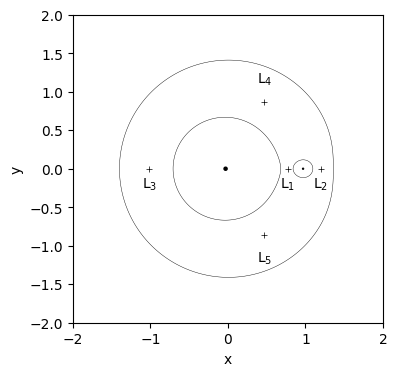

In [ ]:
fig = plt.figure(figsize=(4,4))
ax = fig.add_subplot(111)
R1 = 0.02
R2 = R1*np.cbrt(f/(1-f)) # = R1*np.cbrt(M2/M1) in mass-ratio form
primary = ax.add_patch(plt.Circle((xi1,0),R1,color='black',zorder=4))
secondary = ax.add_patch(plt.Circle((xi2,0),R2,color='black',zorder=4))
zvPhi = -0.5*listCJ
ax.set_xlabel('x')
ax.set_ylabel('y')
for k in range(5):
  ax.plot(L_points[k][0],L_points[k][1], '+', color='black', mew=0.5, ms=4, zorder=4)
  ax.text(L_points[k][0]+L_offset[k][0],L_points[k][1]+L_offset[k][1],fr'L$_{k+1}$', color='black',va='center',ha='center')
cs = ax.contour(xi,eta,ePhi,levels=[zvPhi],colors=['black'],linestyles='solid',linewidths=0.3)




## Problems for you!


1.   Play with the CJ levels above.  Are there physical limits to CJ?  What do the exclusion plots look like as you make CJ lower or higher?
2.   Play around with the mass ratios.  How do the CJ values and/or contour plots change?



